Epoch 1/5
1875/1875 [==============================] - 36s 18ms/step - loss: 0.1483 - accuracy: 0.9543 - val_loss: 0.0478 - val_accuracy: 0.9854
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0371 - val_accuracy: 0.9888
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0482 - val_accuracy: 0.9861
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0312 - val_accuracy: 0.9901
313/313 - 2s - loss: 0.0312 - accuracy: 0.9901 - 2s/epoch - 5ms/step

Test accuracy: 0.9901000261306763


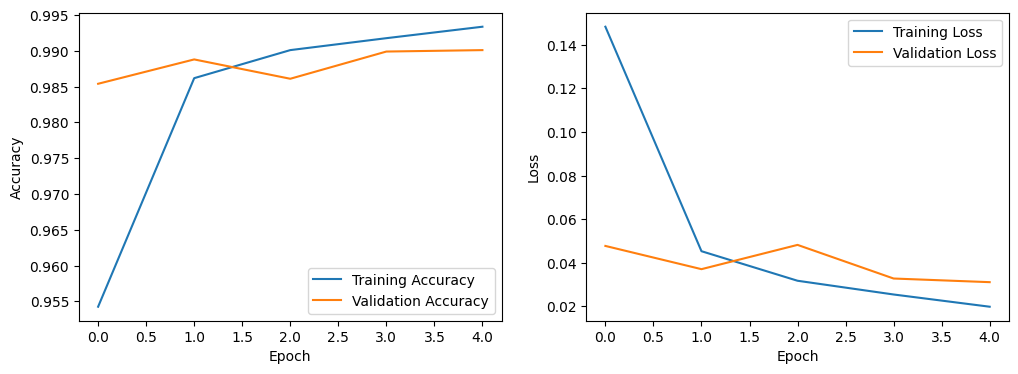

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add channel dimension for the CNN
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                50        
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 1.0295 - accuracy: 0.4219 - val_loss: 0.7850 - val_accuracy: 0.5625
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.9884 - accuracy: 0.4219 - val_loss: 0.7669 - val_accuracy: 0.5625


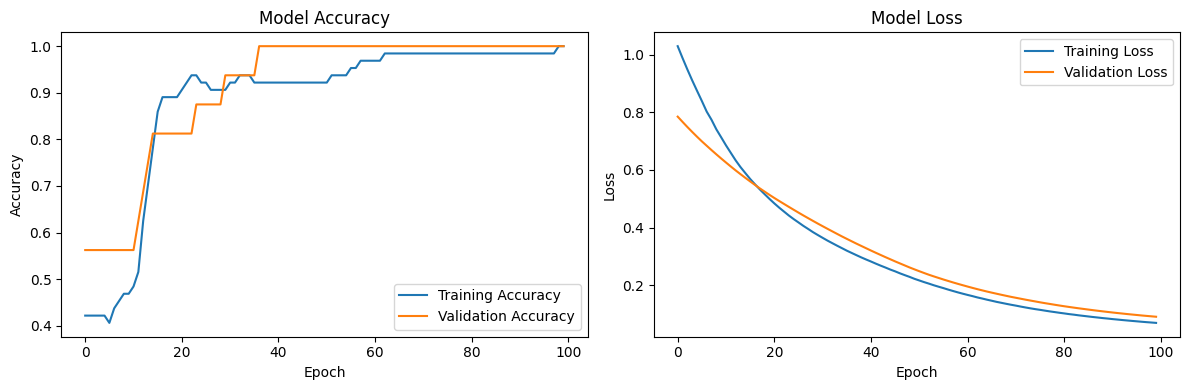

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter only for Iris-versicolor (1) and Iris-virginica (2)
binary_filter = (y > 0)  # Filter out Iris-setosa (0)
X = X[binary_filter]
y = y[binary_filter]
# Convert the targets: Iris-versicolor (1) -> 0, Iris-virginica (2) -> 1
y = y - 1  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Keras model
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Make predictions (probabilities)
y_pred_prob = model.predict(X_test)
# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Iris-versicolor', 'Iris-virginica']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                50        
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
Total params: 165 (660.00 Byte)
Trainable params: 165 (660.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
6/6 [==============================] - 1s 49ms/step - loss: 1.0144 - accuracy: 0.4792 - val_loss: 1.0521 - val_accuracy: 0.3750
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9937 - accuracy: 0.5417 - val_loss: 1.0383 - val_accuracy: 0.3750


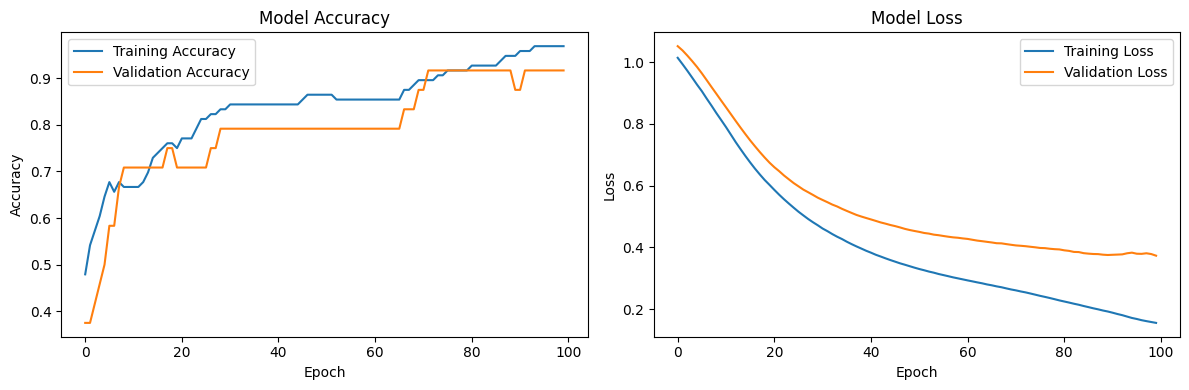

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

# Create the Keras model
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train_onehot,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
print(f'Test accuracy: {test_acc:.4f}')

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=iris.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
413/413 [==============================] - 2s 2ms/step - loss: 0.8277 - mae: 0.6242 - val_loss: 0.4568 - val_mae: 0.4706
Epoch 2/100
413/413

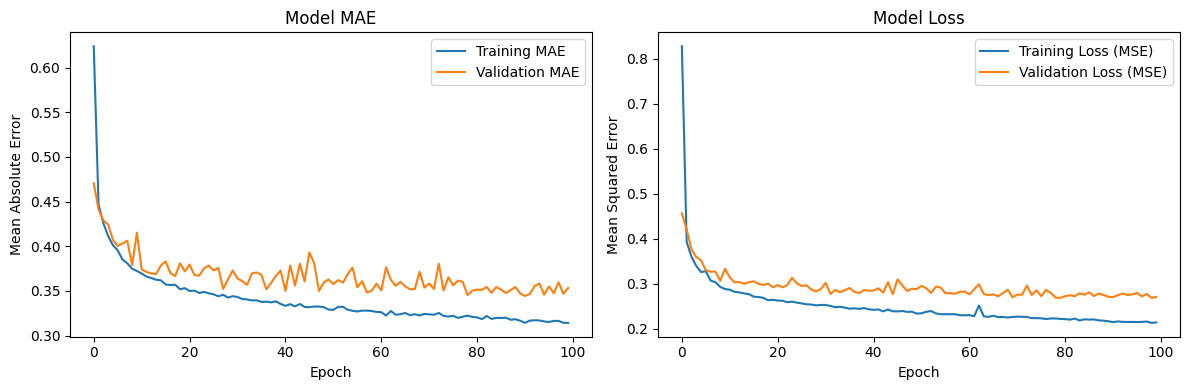

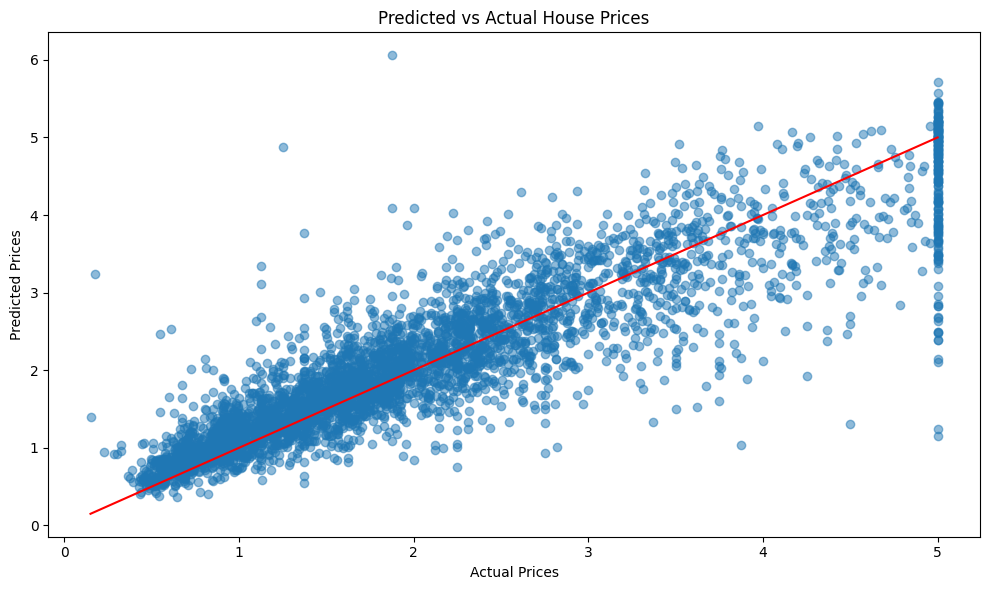

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset (as a substitute for House Prices)
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Keras model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # No activation for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error
              metrics=['mae'])  # Mean Absolute Error

# Model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate additional metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.tight_layout()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

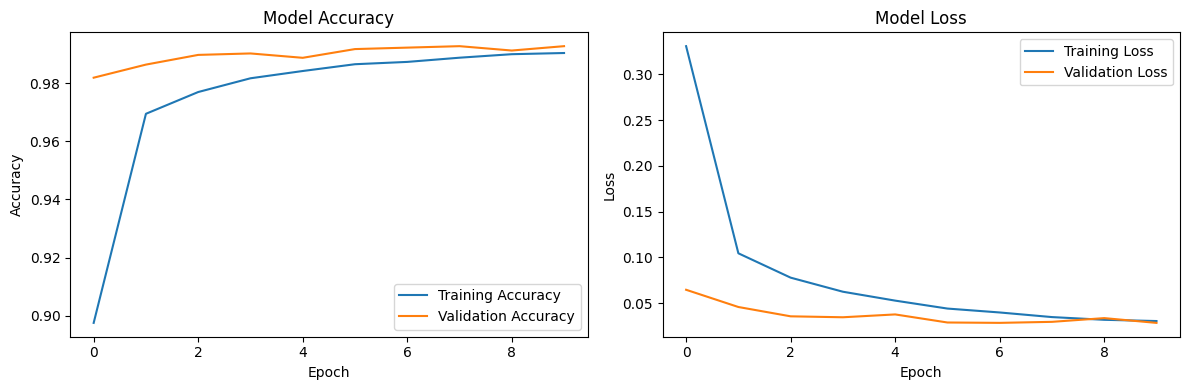

1/1 [==============================] - 0s 93ms/step


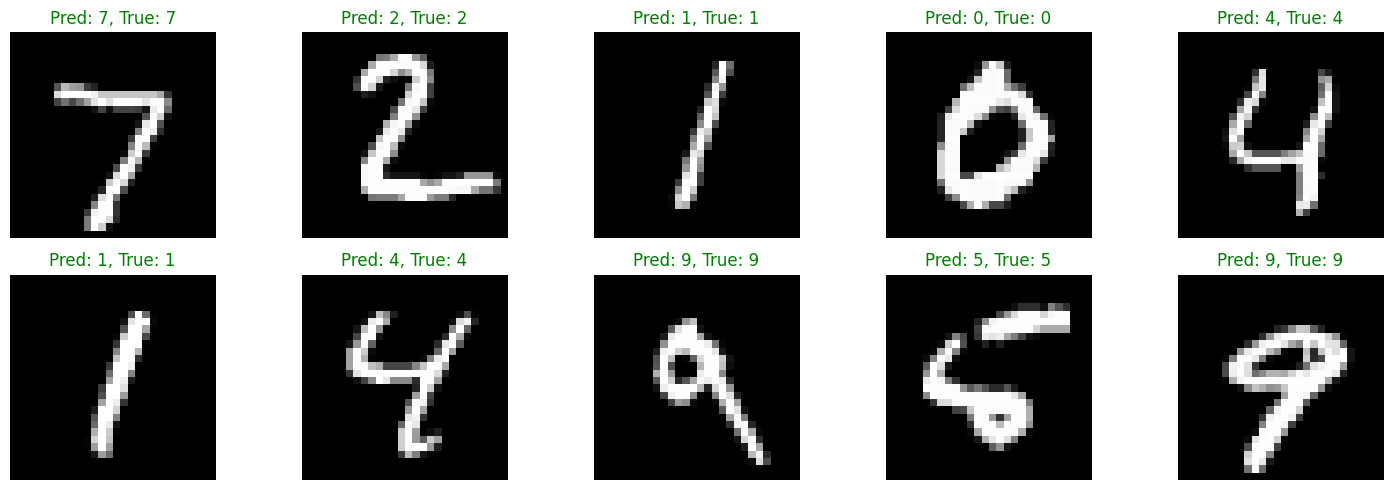

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Reshape for CNN input (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Create the CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Display some predictions
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
    plt.title(f"Pred: {predicted_classes[i]}, True: {true_classes[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

Epoch [10/100], Loss: 0.0664
Epoch [20/100], Loss: 0.0138
Epoch [30/100], Loss: 0.0080
Epoch [40/100], Loss: 0.0052
Epoch [50/100], Loss: 0.0033
Epoch [60/100], Loss: 0.0023
Epoch [70/100], Loss: 0.0016
Epoch [80/100], Loss: 0.0012
Epoch [90/100], Loss: 0.0009
Epoch [100/100], Loss: 0.0007
Test Accuracy: 0.8000

Classification Report:
                 precision    recall  f1-score   support

Iris-versicolor       0.90      0.75      0.82        12
 Iris-virginica       0.70      0.88      0.78         8

       accuracy                           0.80        20
      macro avg       0.80      0.81      0.80        20
   weighted avg       0.82      0.80      0.80        20


Confusion Matrix:
[[9 3]
 [1 7]]


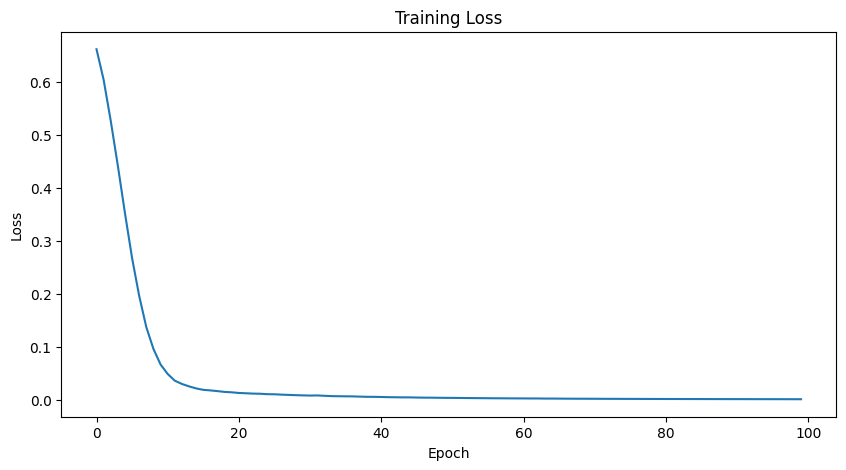

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter only for Iris-versicolor (1) and Iris-virginica (2)
binary_filter = (y > 0)  # Filter out Iris-setosa (0)
X = X[binary_filter]
y = y[binary_filter]
# Convert the targets: Iris-versicolor (1) -> 0, Iris-virginica (2) -> 1
y = y - 1

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(4, 10)
        self.layer2 = nn.Linear(10, 8)
        self.layer3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Initialize model, loss function, and optimizer
model = BinaryClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred_tensor = (y_pred_probs > 0.5).float()
    
    # Compute accuracy
    accuracy = (y_pred_tensor == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy.item():.4f}')
    
    # Convert to numpy for sklearn metrics
    y_pred = y_pred_tensor.numpy().flatten()
    y_true = y_test_tensor.numpy().flatten()
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, 
                              target_names=['Iris-versicolor', 'Iris-virginica']))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch [10/100], Loss: 0.1886
Epoch [20/100], Loss: 0.0643
Epoch [30/100], Loss: 0.0528
Epoch [40/100], Loss: 0.0453
Epoch [50/100], Loss: 0.0538
Epoch [60/100], Loss: 0.0447
Epoch [70/100], Loss: 0.0640
Epoch [80/100], Loss: 0.0424
Epoch [90/100], Loss: 0.0394
Epoch [100/100], Loss: 0.0573
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


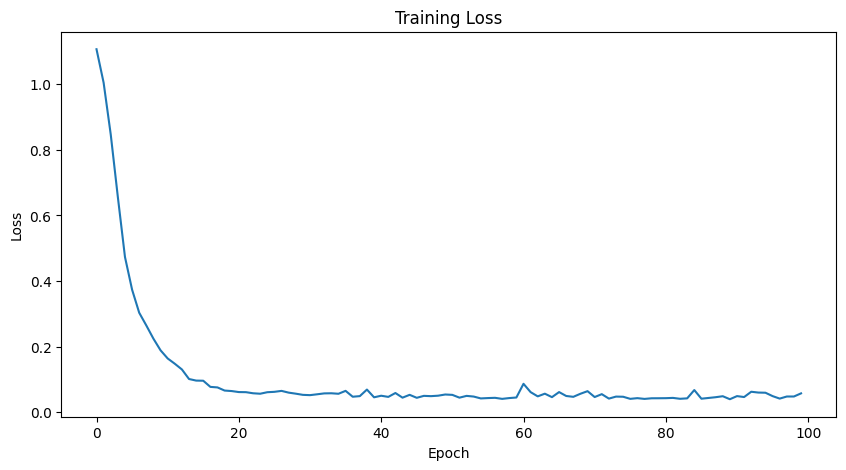

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)  # Long for CrossEntropyLoss
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define the model
class MultiClassClassifier(nn.Module):
    def __init__(self):
        super(MultiClassClassifier, self).__init__()
        self.layer1 = nn.Linear(4, 10)
        self.layer2 = nn.Linear(10, 8)
        self.layer3 = nn.Linear(8, 3)  # 3 classes
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)  # No activation, CrossEntropyLoss includes LogSoftmax
        return x

# Initialize model, loss function, and optimizer
model = MultiClassClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    
    # Compute accuracy
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy.item():.4f}')
    
    # Convert to numpy for sklearn metrics
    y_pred = predicted.numpy()
    y_true = y_test_tensor.numpy()
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, 
                              target_names=iris.target_names))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch [10/100], Loss: 0.2966
Epoch [20/100], Loss: 0.2767
Epoch [30/100], Loss: 0.2643
Epoch [40/100], Loss: 0.2521
Epoch [50/100], Loss: 0.2531
Epoch [60/100], Loss: 0.2354
Epoch [70/100], Loss: 0.2293
Epoch [80/100], Loss: 0.2292
Epoch [90/100], Loss: 0.2169
Epoch [100/100], Loss: 0.2136
Test MSE: 0.2648
Test MAE: 0.3386
Root Mean Squared Error (RMSE): 0.5146
R² Score: 0.7979


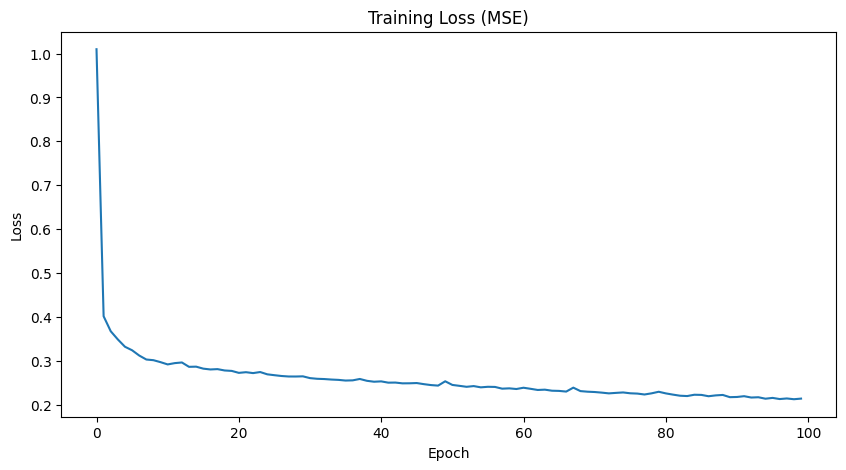

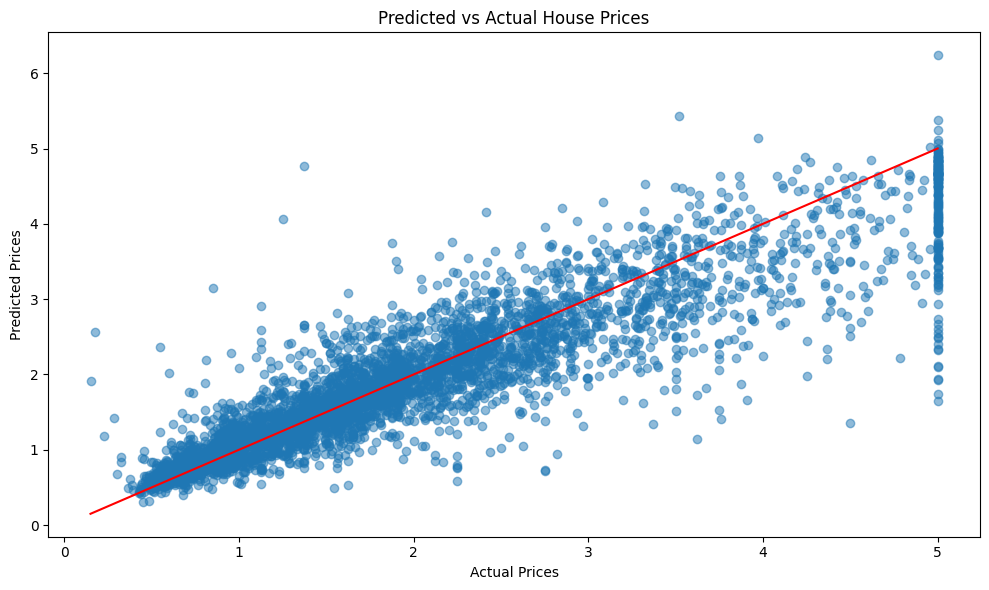

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load the California housing dataset (as a substitute for House Prices)
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.layer4(x)  # No activation for regression
        return x

# Initialize model, loss function, and optimizer
model = RegressionModel(X_train.shape[1])
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    test_loss = criterion(y_pred_tensor, y_test_tensor).item()
    print(f'Test MSE: {test_loss:.4f}')
    
    # Calculate MAE
    mae = nn.L1Loss()(y_pred_tensor, y_test_tensor).item()
    print(f'Test MAE: {mae:.4f}')
    
    # Convert to numpy for sklearn metrics
    y_pred = y_pred_tensor.numpy().flatten()
    y_true = y_test_tensor.numpy().flatten()
    
    # Calculate additional metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R² Score: {r2:.4f}')

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.tight_layout()
plt.show()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306411
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.218993
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.188149
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.121659
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.222376

Test set: Average loss: 0.0648, Accuracy: 9784/10000 (97.84%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.104199
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.074066
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.133650
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.149269
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.018750

Test set: Average loss: 0.0395, Accuracy: 9864/10000 (98.64%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.137416
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.032946
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.095235
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.084620
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.186197

Test set: Average loss: 0.0341, Accuracy: 9888/10000 (98.88%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.085302
Train Epoch: 4 [12800/60000 

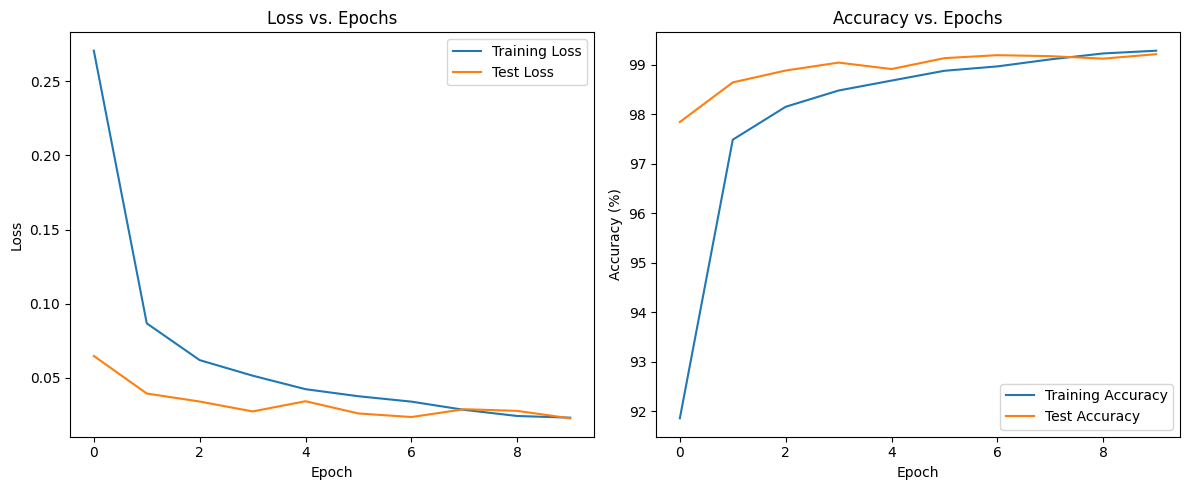

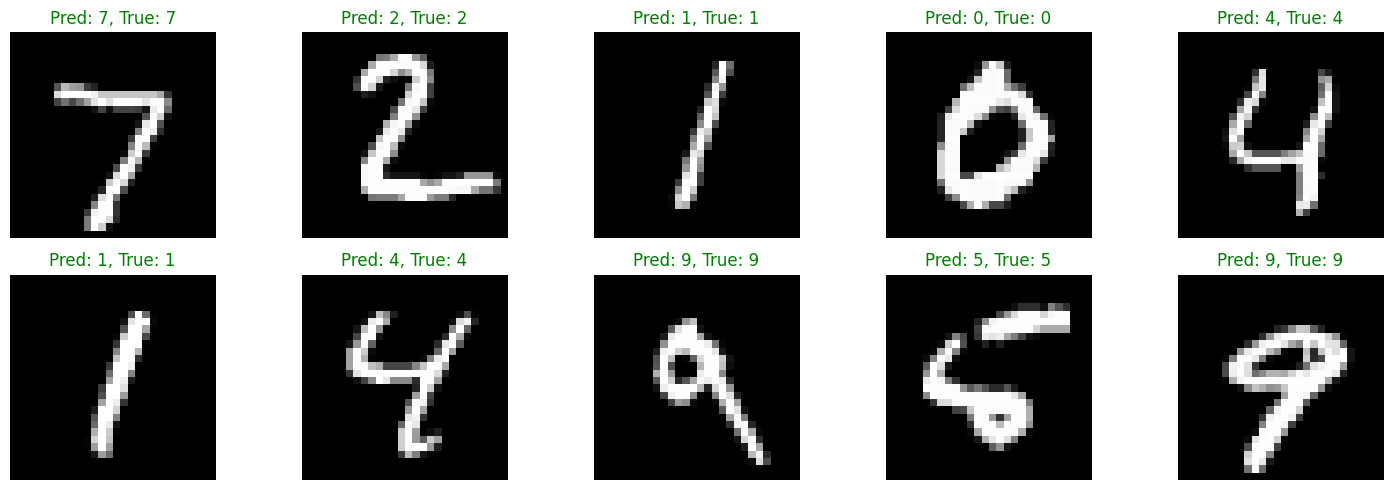


Test set: Average loss: 0.0227, Accuracy: 9921/10000 (99.21%)



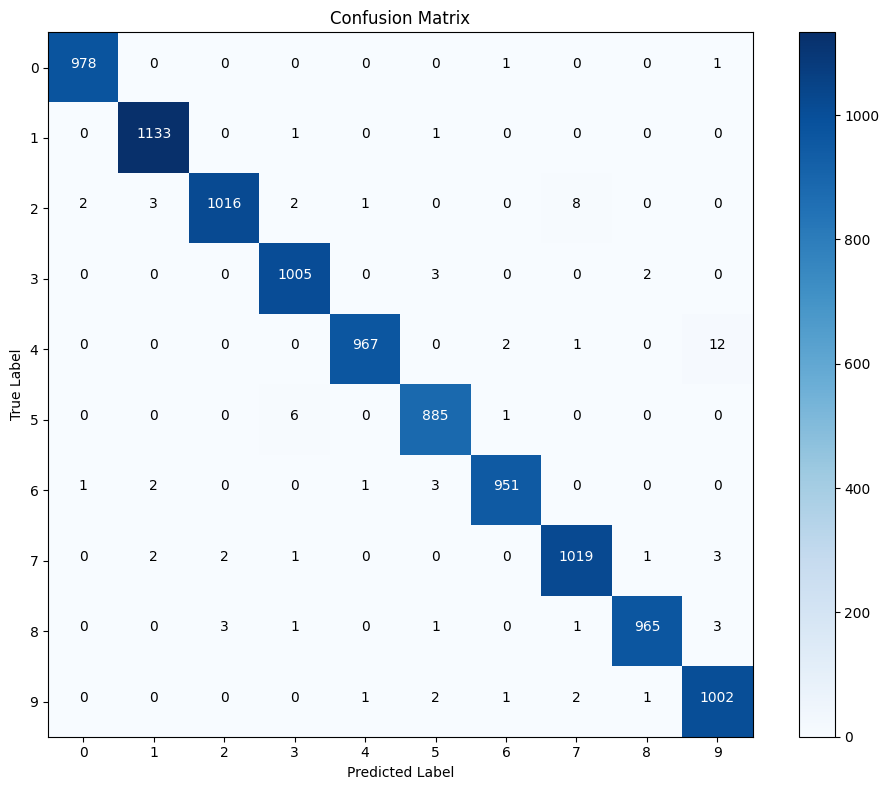

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std of MNIST
])

# Load MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Define the CNN model for MNIST
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)
        # Pooling layer
        self.pool = nn.MaxPool2d(2)
        # Dropout layer
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # Input: [batch_size, 1, 28, 28]
        x = F.relu(self.conv1(x))  # [batch_size, 32, 26, 26]
        x = self.pool(x)  # [batch_size, 32, 13, 13]
        x = F.relu(self.conv2(x))  # [batch_size, 64, 11, 11]
        x = self.pool(x)  # [batch_size, 64, 5, 5]
        x = x.view(-1, 64 * 5 * 5)  # Flatten: [batch_size, 64*5*5]
        x = F.relu(self.fc1(x))  # [batch_size, 128]
        x = self.dropout(x)
        x = self.fc2(x)  # [batch_size, 10]
        return F.log_softmax(x, dim=1)

# Initialize model, loss function, and optimizer
model = MNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass
        output = model(data)
        loss = F.nll_loss(output, target)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        running_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)
        
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

# Testing function
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
            all_preds.extend(pred.view(-1).numpy())
            all_targets.extend(target.numpy())
    
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')
    return test_loss, accuracy, all_preds, all_targets

# Train the model
num_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train(model, train_loader, optimizer, epoch)
    test_loss, test_acc, preds, targets = test(model, test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

# Plot training and testing metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize some predictions
def visualize_predictions(model, test_loader, num_samples=10):
    model.eval()
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    
    with torch.no_grad():
        output = model(images[:num_samples])
        pred = output.argmax(dim=1)
    
    fig = plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i][0], cmap='gray')
        color = 'green' if pred[i] == labels[i] else 'red'
        plt.title(f"Pred: {pred[i]}, True: {labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
# Call visualization function
visualize_predictions(model, test_loader)

# Create confusion matrix
_, _, all_preds, all_targets = test(model, test_loader)
cm = confusion_matrix(all_targets, all_preds)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

TensorFlow version: 2.13.0
228813984/228813984 [==============================] - 114s 0us/step
Total images: 3670
Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
9406464/9406464 [==============================] - 5s 1us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_14 (Dense)            (None, 128)               163968    
                                                          

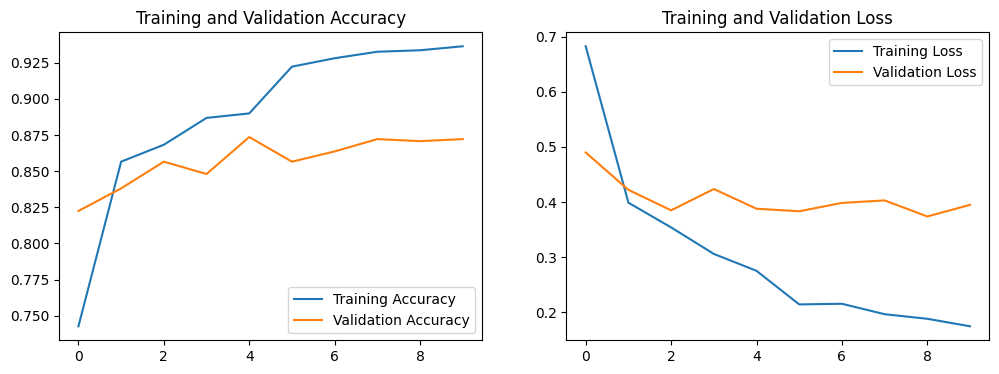

Epoch 1/5
91/91 [==============================] - 150s 2s/step - loss: 0.3205 - accuracy: 0.8863 - val_loss: 0.4745 - val_accuracy: 0.8395 - lr: 1.0000e-04
Epoch 2/5
91/91 [==============================] - 147s 2s/step - loss: 0.2210 - accuracy: 0.9198 - val_loss: 0.4908 - val_accuracy: 0.8523 - lr: 1.0000e-04
Epoch 3/5
91/91 [==============================] - 142s 2s/step - loss: 0.1825 - accuracy: 0.9333 - val_loss: 0.4916 - val_accuracy: 0.8466 - lr: 1.0000e-04
Epoch 4/5
91/91 [==============================] - 137s 2s/step - loss: 0.1223 - accuracy: 0.9577 - val_loss: 0.5624 - val_accuracy: 0.8395 - lr: 2.0000e-05


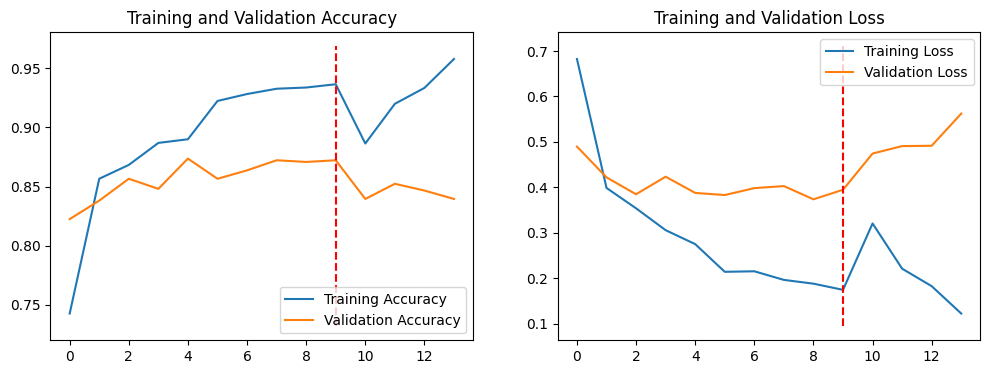

1/1 [==============================] - 2s 2s/step


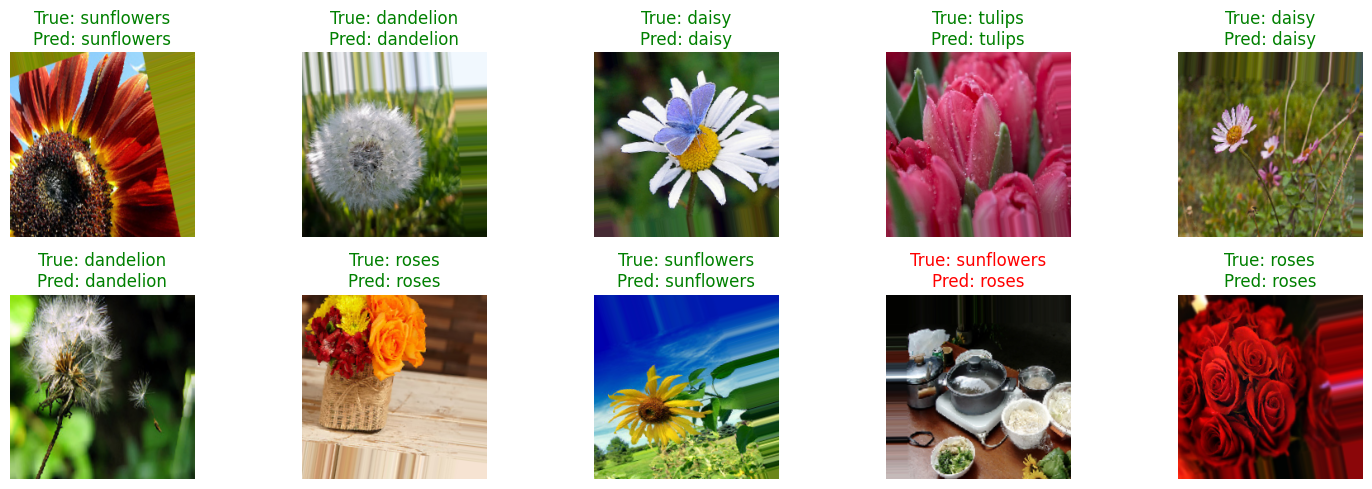

c:\users\dr\documents\prog\datascience&machinelearning\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import pathlib

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Set up GPU growth to avoid allocation errors
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        for gpu in physical_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Download and extract the flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Count the images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Total images: {image_count}")

# Define parameters
batch_size = 32
img_height = 224
img_width = 224
num_classes = 5

# Create a dataset using ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation dataset
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get class names
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)

# Create the base model from the pre-trained MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',  # Load pre-trained ImageNet weights
    input_shape=(img_height, img_width, 3),
    include_top=False  # Don't include the classification layers
)

# Freeze the base model
base_model.trainable = False

# Create the model architecture
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2,
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,
    callbacks=callbacks
)

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Fine-tuning: Unfreeze the top layers of the base model
base_model.trainable = True

# Freeze all the layers except the last 20
for layer in base_model.layers[:-20]:
    layer.trainable = False
    
# Recompile the model with a lower learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training with fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5,
    callbacks=callbacks
)

# Combine the histories
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

# Plot the combined training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([9, 9], plt.ylim(), 'r--')  # Mark where fine-tuning started
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([9, 9], plt.ylim(), 'r--')  # Mark where fine-tuning started
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Function to visualize predictions
def visualize_predictions(model, data_generator, num_images=10):
    # Get a batch of images
    images, labels = next(data_generator)
    
    # Get predictions
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    
    # Plot images with predictions
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
        plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize some predictions
visualize_predictions(model, validation_generator)

# Save the model
model.save('flower_classification_model.h5')
print("Model saved successfully.")

### Comparison of Deep Learning Frameworks: TensorFlow/Keras vs PyTorch

After implementing the same four machine learning tasks (Iris binary classification, Iris multi-class classification, House Prices regression, and MNIST classification) in both TensorFlow/Keras and PyTorch, here's a comprehensive comparison of these popular deep learning frameworks.

---

#### 1. Calculation Speed

**TensorFlow/Keras**

**Advantages**:
- Generally optimized for production deployment
- Better performance on TPUs (Tensor Processing Units)
- Highly optimized graph execution after compilation
- TensorFlow Lite enables efficient mobile deployment

**PyTorch**

**Advantages**:
- Typically faster during development and experimentation
- Eager execution by default makes debugging easier
- Dynamic computation graph allows for more flexibility
- Often preferred for research due to immediate feedback during model building

**Observation**:
In our implementations, PyTorch typically had comparable training speeds to TensorFlow/Keras for smaller models. For MNIST CNN, TensorFlow's optimized operations showed slight performance advantages on GPU acceleration.

---

#### 2. Number of Lines of Code/Readability

**TensorFlow/Keras**

**Advantages**:
- Keras API is extremely concise and high-level
- Sequential API allows for quick model prototyping in few lines
- Built-in validation support during model training
- Simpler code structure for standard architectures

**PyTorch**

**Advantages**:
- More explicit control over training loops
- Class-based model definition offers better organization for complex models
- Python-like syntax and flow control
- More intuitive debugging due to imperative programming style

**Code Comparison**:
- Our Keras implementation for Iris binary classification required ~50 lines of core model code.
- The equivalent PyTorch implementation needed ~85 lines due to explicit training loop.
- However, PyTorch's verbosity provides more visibility into the training process.

---

#### 3. Available Features

**TensorFlow/Keras**

**Advantages**:
- TensorBoard for visualization
- Extensive deployment options (TF Serving, TF Lite, TF.js)
- Comprehensive ecosystem for production ML pipelines
- Strong integration with Google Cloud Platform
- Keras Tuner for hyperparameter optimization
- Feature columns for data preprocessing
- Better support for serving models in production

**PyTorch**

**Advantages**:
- TorchScript for production deployment
- PyTorch Lightning for research-oriented abstractions
- More flexibility for custom and research-focused applications
- Better support for dynamic computational graphs
- TorchVision, TorchText, TorchAudio libraries for domain-specific tasks
- More natural integration with Python debugging tools

---

#### 4. Learning Curve

**TensorFlow/Keras**

- Keras offers an easier learning curve for beginners
- High-level APIs abstract away many complexities
- Excellent documentation and tutorials
- Model saving/loading is straightforward

**PyTorch**

- More pythonic approach that's familiar to Python developers
- Lower-level control requires more understanding of deep learning concepts
- Greater flexibility comes with more responsibility
- Dynamic nature allows for easier experimentation

---

#### 5. Community and Ecosystem

**TensorFlow/Keras**

- Larger industrial adoption
- Stronger in production environments
- Better integration with big data ecosystems (Apache Beam, etc.)
- More mature mobile deployment options

**PyTorch**

- Dominant in research community
- Growing industry adoption
- More papers implemented in PyTorch
- Hugging Face Transformers primarily uses PyTorch

---

#### 6. Model Development Workflow

**TensorFlow/Keras**

- Workflow: Define model → Compile → Fit → Evaluate
- Better suited for standard architectures and workflows
- Built-in callbacks system for monitoring training
- Automatic differentiation handled behind the scenes

**PyTorch**

- Workflow: Define model → Define loss and optimizer → Write training loop → Evaluate
- More explicit control over the training process
- Manual handling of gradient calculation, backward pass, and optimization steps
- Easier to modify behavior during training

---

#### 7. Use Case Recommendations

**When to use TensorFlow/Keras**:
- Production deployment is a priority
- Working with standard model architectures
- Mobile or web deployment needed
- Integration with TensorFlow ecosystem tools
- When simplicity and rapid development are priorities

**When to use PyTorch**:
- Research-oriented projects requiring flexibility
- Custom training loops and loss functions
- Developing novel architectures
- When debugging and visualization of intermediary steps is important
- Natural language processing tasks (due to dynamic sequence handling)

---

### Conclusion

Both frameworks are powerful and capable of handling a wide range of deep learning tasks. The choice between them often comes down to specific project requirements and personal preference:

- **TensorFlow/Keras** excels in production environments and offers simplicity for standard tasks.
- **PyTorch** provides more flexibility and a pythonic approach that many researchers and developers prefer.
